##ASSIGNMENT-1
Q1) For the Data Set You Have Collected (Mandya climate prediction) for your Project
Work Draw the Box Plot Model for Attest 5 Attributes & Attach the Print out of the Box plot Model you have obtained



Packages Import Section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression,f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score,recall_score,precision_score,classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Dataset: the dataset was obtained from <i>visualcrossing.com<i> . the dataset has weather observations from jan-1-2023 to till date(total 356 observations)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mandya_weather.csv')
df.head(10)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Mandya,01-01-2023,30.0,16.3,22.5,28.9,16.3,22.4,13.6,59.3,...,21.7,9,10,01-01-2023 06:43,01-01-2023 18:07,0.30,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"43289099999,remote,VOMY"
1,Mandya,02-01-2023,30.0,17.1,22.6,28.8,17.1,22.3,12.7,56.8,...,20.8,8,10,02-01-2023 06:44,02-01-2023 18:08,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"43289099999,43291099999,remote,VOMY"
2,Mandya,03-01-2023,29.0,16.1,NaN,28.8,16.1,22.1,14.5,64.3,...,22.1,9,10,03-01-2023 06:44,03-01-2023 18:09,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"43289099999,remote,VOMY"
3,Mandya,04-01-2023,29.0,16.3,21.8,28.5,16.3,21.8,NaN,67.5,...,22.2,9,10,04-01-2023 06:44,04-01-2023 18:09,0.41,Clear,Clear conditions throughout the day.,clear-day,"43289099999,43291099999,remote,VOMY"
4,Mandya,05-01-2023,29.0,16.0,22.0,28.8,16.0,22.0,15.6,69.5,...,22.0,9,10,05-01-2023 06:45,05-01-2023 18:10,0.44,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"43289099999,43291099999,remote,VOMY"
5,Mandya,06-01-2023,29.0,15.9,21.8,28.5,15.9,21.7,14.8,NaN,...,NaN,9,10,06-01-2023 06:45,06-01-2023 18:10,0.48,Clear,Clear conditions throughout the day.,clear-day,"43289099999,43291099999,remote,VOMY"
6,NaN,07-01-2023,29.0,15.7,21.9,28.8,15.7,21.9,15.6,69.9,...,21.6,9,10,07-01-2023 06:45,07-01-2023 18:11,0.50,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"43289099999,43291099999,remote,VOMY,43263099999"
7,Mandya,08-01-2023,28.0,16.7,22.0,28.0,16.7,NaN,14.8,65.9,...,22.2,9,10,08-01-2023 06:46,08-01-2023 18:11,0.54,Clear,Clear conditions throughout the day.,clear-day,"43289099999,43291099999,remote,VOMY"
8,Mandya,09-01-2023,29.0,15.9,22.0,28.5,15.9,21.9,13.2,NaN,...,22.8,9,10,09-01-2023 06:46,09-01-2023 18:12,0.58,Clear,Clear conditions throughout the day.,clear-day,"43289099999,43291099999,remote,VOMY"
9,Mandya,10-01-2023,30.0,13.4,20.9,28.8,13.4,20.7,10.6,54.6,...,23.2,9,10,10-01-2023 06:46,10-01-2023 18:12,0.61,Clear,Clear conditions throughout the day.,clear-day,"43289099999,43291099999,remote,VOMY"


Box Plot Model:for box plotting we decided to chose the following attributes
<ul>temperature</ul><ul>humidity</ul><ul>windspeed</ul><ul>cloudcover</ul><ul>dew</ul><ul>solarenergy</ul><ul>sealevelpressure</ul>

In [ ]:
df = df[['temp', 'humidity', 'windspeed', 'cloudcover', 'dew', 'solarenergy', 'sealevelpressure','conditions']]
df.head(10)

,temp,humidity,windspeed,cloudcover,dew,solarenergy,sealevelpressure,conditions
0,22.5,59.3,14.8,43.5,13.6,21.7,1017.7,Partially cloudy
1,22.6,56.8,25.9,NaN,12.7,20.8,1017.1,Partially cloudy
2,NaN,64.3,NaN,21.2,14.5,22.1,NaN,Partially cloudy
3,21.8,67.5,NaN,14.9,NaN,22.2,1016.2,Clear
4,22.0,69.5,27.7,22.8,15.6,22.0,1017.1,Partially cloudy
5,21.8,NaN,25.9,14.1,14.8,NaN,NaN,Clear
6,21.9,69.9,22.3,29.5,15.6,21.6,1017.4,Partially cloudy
7,22.0,65.9,20.5,17.3,14.8,22.2,1016.1,Clear
8,22.0,NaN,14.8,6.8,13.2,22.8,1017.1,Clear
9,20.9,54.6,18.4,16.9,10.6,23.2,1017.0,Clear


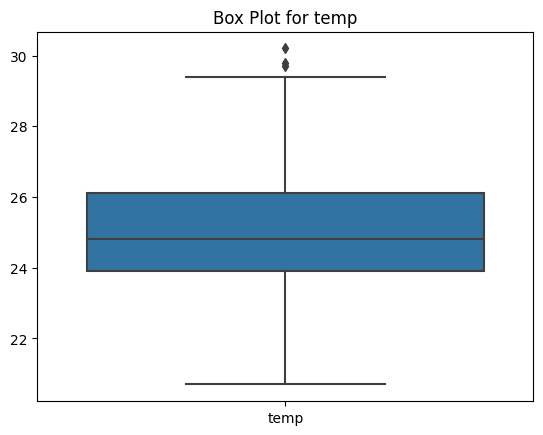

In [ ]:
attribute = ['temp']
sns.boxplot(data=df[attribute])
plt.title('Box Plot for temp')
plt.show()

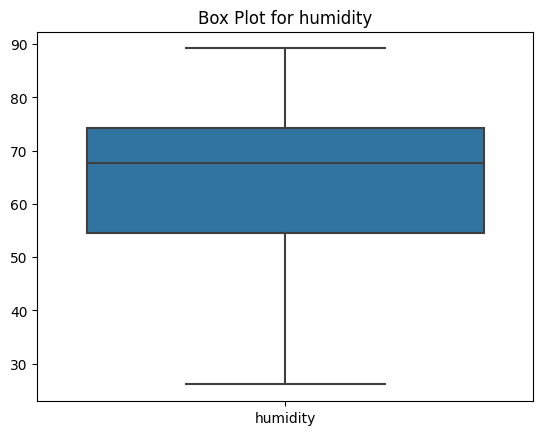

In [ ]:
attribute =[ 'humidity']
sns.boxplot(data=df[attribute])
plt.title('Box Plot for humidity')
plt.show()

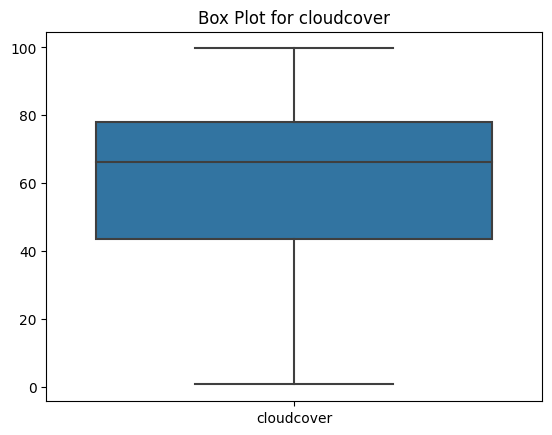

In [ ]:
attribute =['cloudcover']
sns.boxplot(data=df[attribute])
plt.title('Box Plot for cloudcover')
plt.show()

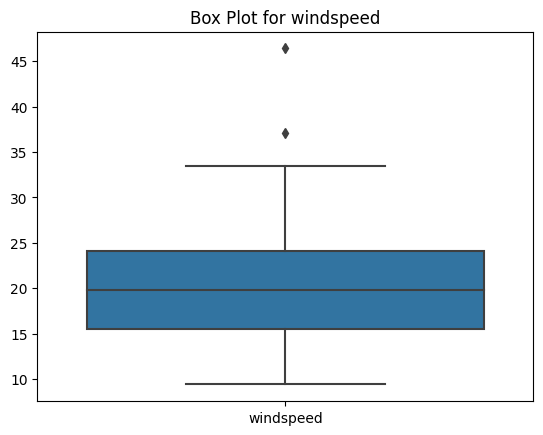

In [ ]:
attribute =['windspeed']
sns.boxplot(data=df[attribute])
plt.title('Box Plot for windspeed')
plt.show()

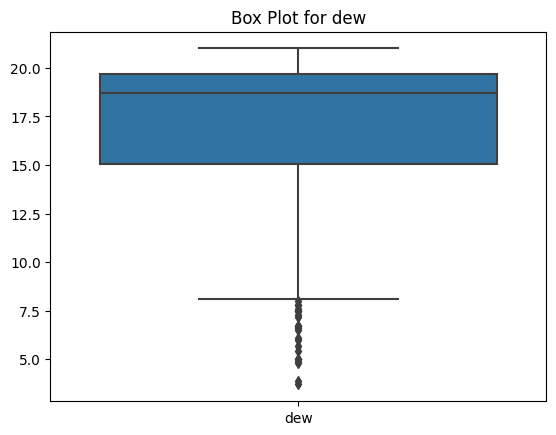

In [ ]:
attribute =['dew']
sns.boxplot(data=df[attribute])
plt.title('Box Plot for dew')
plt.show()

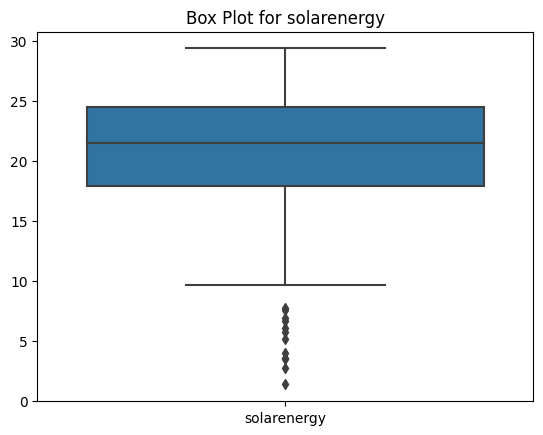

In [ ]:
attribute = ['solarenergy']
sns.boxplot(data=df[attribute])
plt.title('Box Plot for solarenergy')
plt.show()

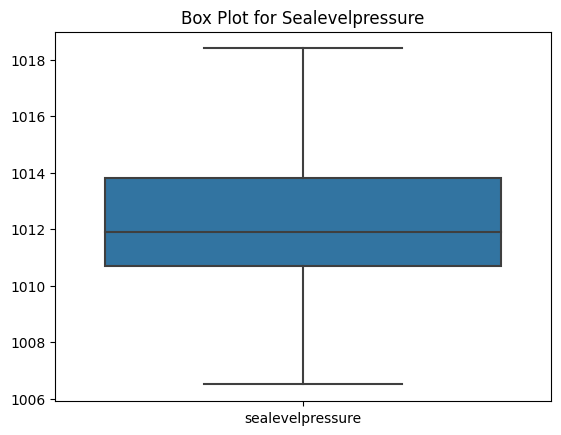

In [ ]:
attribute = ['sealevelpressure']
sns.boxplot(data=df[attribute])
plt.title('Box Plot for Sealevelpressure')
plt.show()

In [ ]:
attributes = ['temp', 'humidity', 'windspeed', 'cloudcover', 'dew', 'solarenergy', 'sealevelpressure']

for attribute in attributes:
    Q1 = df[attribute].quantile(0.25)
    Q3 = df[attribute].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[attribute] = df[attribute].apply(lambda x: x if lower_bound <= x <= upper_bound else None)


Q2) For the Data Set You Have Collected for your Project    
       How do you perform the followings.
      
<ul> i) Data Remediation</ul>
<ul>ii) Handling of Missing Data </ul>

(Justify by Implementing Data Imputing technique on your data set)

Q3) Perform Future Scaling & Future Selection on the Above Data set.

Q4) Find out the Confusion Matrix for the Given Data (Above Said)  Set and also find out the manually.
<ul>i) Model Accuracy</ul>
<ul>ii) Kappa Valus</ul>     
<ul>iii)Error Rate</ul>    
<ul>iv)Sensitivity</ul>
<ul>v)Specificity</ul>   
<ul>vi)Precision</ul>   
<ul>vii)Recall</ul>  
<ul>viii) F-Measure</ul>


Q2)Data Remediation and Handling of Missing Data:we remidied the inconsitancies in the numeric data by filling the cells with outliers with median values.

In [ ]:

df.head(10)

,temp,humidity,windspeed,cloudcover,dew,solarenergy,sealevelpressure,conditions
0,22.5,59.3,14.8,43.5,13.6,21.7,1017.7,Partially cloudy
1,22.6,56.8,25.9,NaN,12.7,20.8,1017.1,Partially cloudy
2,NaN,64.3,NaN,21.2,14.5,22.1,NaN,Partially cloudy
3,21.8,67.5,NaN,14.9,NaN,22.2,1016.2,Clear
4,22.0,69.5,27.7,22.8,15.6,22.0,1017.1,Partially cloudy
5,21.8,NaN,25.9,14.1,14.8,NaN,NaN,Clear
6,21.9,69.9,22.3,29.5,15.6,21.6,1017.4,Partially cloudy
7,22.0,65.9,20.5,17.3,14.8,22.2,1016.1,Clear
8,22.0,NaN,14.8,6.8,13.2,22.8,1017.1,Clear
9,20.9,54.6,18.4,16.9,10.6,23.2,1017.0,Clear


In [ ]:


df = df.fillna(df.median())


<ipython-input-1180-a187aa03e3ee>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


we also removed any observations with completely empty values.

In [ ]:

df.head(10)

,temp,humidity,windspeed,cloudcover,dew,solarenergy,sealevelpressure,conditions
0,22.5,59.3,14.8,43.5,13.6,21.7,1017.7,Partially cloudy
1,22.6,56.8,25.9,66.3,12.7,20.8,1017.1,Partially cloudy
2,24.8,64.3,19.8,21.2,14.5,22.1,1011.9,Partially cloudy
3,21.8,67.5,19.8,14.9,18.9,22.2,1016.2,Clear
4,22.0,69.5,27.7,22.8,15.6,22.0,1017.1,Partially cloudy
5,21.8,67.7,25.9,14.1,14.8,21.7,1011.9,Clear
6,21.9,69.9,22.3,29.5,15.6,21.6,1017.4,Partially cloudy
7,22.0,65.9,20.5,17.3,14.8,22.2,1016.1,Clear
8,22.0,67.7,14.8,6.8,13.2,22.8,1017.1,Clear
9,20.9,54.6,18.4,16.9,10.6,23.2,1017.0,Clear


we need to check the condtions column for what are the possible categorical values, it would be easier to be converted into numeric values.

In [ ]:
unique_conditions=df['conditions'].unique()
unique_conditions

array(['Partially cloudy', 'Clear', 'Overcast', 'Rain, Partially cloudy',
       'Rain, Overcast'], dtype=object)

By using .factorize() function we are able convert categorical data in the conditions column into numeric data and we are saving the result in a new column 'condition_encoded'.

In [ ]:

df['condition_encoded'] = df['conditions'].factorize()[0]
df['condition_encoded'].unique()


array([0, 1, 2, 3, 4])

In [ ]:
df.head(10)

,temp,humidity,windspeed,cloudcover,dew,solarenergy,sealevelpressure,conditions,condition_encoded
0,22.5,59.3,14.8,43.5,13.6,21.7,1017.7,Partially cloudy,0
1,22.6,56.8,25.9,66.3,12.7,20.8,1017.1,Partially cloudy,0
2,24.8,64.3,19.8,21.2,14.5,22.1,1011.9,Partially cloudy,0
3,21.8,67.5,19.8,14.9,18.9,22.2,1016.2,Clear,1
4,22.0,69.5,27.7,22.8,15.6,22.0,1017.1,Partially cloudy,0
5,21.8,67.7,25.9,14.1,14.8,21.7,1011.9,Clear,1
6,21.9,69.9,22.3,29.5,15.6,21.6,1017.4,Partially cloudy,0
7,22.0,65.9,20.5,17.3,14.8,22.2,1016.1,Clear,1
8,22.0,67.7,14.8,6.8,13.2,22.8,1017.1,Clear,1
9,20.9,54.6,18.4,16.9,10.6,23.2,1017.0,Clear,1


Q3)Feature Scaling & Feature Selection: the features we used for box plots are selected as independent variables and condition_encoded is selected as dependent variable.

In [ ]:
selected_features = ['temp', 'humidity', 'windspeed', 'dew','cloudcover','solarenergy','sealevelpressure']
scaler = StandardScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])
x = df[selected_features]
y = df['condition_encoded']
selector = SelectKBest(f_classif, k='all')
x_selected = selector.fit_transform(x, y)
print(x)
print(y)

         temp  humidity  windspeed       dew  cloudcover  solarenergy  \
0   -1.406199 -0.349333  -0.998248 -1.377902   -0.676443     0.054043   
1   -1.349409 -0.532338   1.029030 -1.678351    0.254049    -0.167949   
2   -0.100021  0.016676  -0.085060 -1.077453   -1.586529     0.152706   
3   -1.803731  0.250922  -0.085060  0.391409   -1.843639     0.177372   
4   -1.690151  0.397326   1.357777 -0.710237   -1.521232     0.128040   
..        ...       ...        ...       ...         ...          ...   
351 -1.065457  0.265562  -0.943457 -0.476555    0.270373    -0.562600   
352 -0.838296  0.067917  -1.655743  0.391409    0.764187    -0.784592   
353 -1.633360  0.177720  -0.413808 -0.910537   -0.843768     0.004711   
354 -1.690151  0.419286  -0.158115 -0.643471   -0.851930    -0.562600   
355 -0.100021  0.419286   0.115842 -0.176106    0.490753     0.054043   

     sealevelpressure  
0            2.489607  
1            2.216690  
2           -0.148597  
3            1.807313  
4  

Training and Testing sets: we are using train_test_split function to split the dataset into training data and testing data, with testing dataset size being 20% of the whole dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(x_train, x_test, y_train, y_test)

         temp  humidity  windspeed       dew  cloudcover  solarenergy  \
144  0.865415  0.265562   0.042786  0.958924    0.184670     0.646020   
132  1.319737  0.119159   1.430832  0.691858    1.506948     0.029377   
66   0.013559 -1.959774   0.572436  0.391409   -0.766227     1.336661   
261 -0.327183  0.902418  -0.340753  0.658475    0.388725     0.448695   
12  -2.201264 -1.169194  -0.998248 -2.880147    1.466137     0.054043   
..        ...       ...        ...       ...         ...          ...   
323 -0.554344  0.258242  -0.340753 -0.309639    0.376482     0.054043   
192  0.240721  0.653532   0.645491  0.725241    0.217319     0.276034   
117  2.341964 -0.971549  -0.012005 -0.276256   -0.488712     1.632650   
47  -0.667925  0.265562  -0.340753  0.391409   -1.394717     1.188667   
172  0.524673  0.682813  -0.340753  0.892157    0.882539    -1.302572   

     sealevelpressure  
144          0.715642  
132         -1.103809  
66           1.488909  
261         -0.148597  
12 

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_bins_train)
y_bins_test = pd.cut(y_test, bins=2, labels=False)
y_pred = model.predict(x_test)
y_bins_test = pd.cut(y_test, bins=2, labels=False)
y_pred_bins = pd.cut(y_pred, bins=2, labels=False)
print(x_test)
print(y_pred)

         temp  humidity  windspeed       dew  cloudcover  solarenergy  \
6   -1.746941  0.426606   0.371534 -0.710237   -1.247798     0.029377   
140  1.092576  0.199681   0.115842  0.625092    0.254049     0.646020   
302 -0.327183  0.873138  -0.669500  0.591708    0.698889    -0.439272   
220  0.411092  0.265562  -0.486863  0.491559    0.421374    -0.636598   
90   1.830850 -1.132593   0.115842 -0.576705   -0.733578    -0.266612   
..        ...       ...        ...       ...         ...          ...   
260 -0.554344  1.180585   0.700282  0.825391    0.645835    -0.414606   
102  2.455544 -2.779634   0.901183  0.391409   -2.202776     1.903973   
22  -0.100021 -0.217570   0.243688 -1.210986   -1.215149     0.226703   
122 -0.100021  1.378230  -0.870402  0.691858    1.531434     0.054043   
89   1.546899 -0.861746  -1.527897 -0.509938   -0.672362     0.991341   

     sealevelpressure  
6            2.353148  
140         -0.194083  
302         -0.148597  
220          0.169807  
90 

Confusion Matrix and Model Metrics

In [ ]:
cm = confusion_matrix(y_bins_test, y_pred_bins)
print(cm)

[[36  8]
 [ 4 41]]


In [ ]:
y_test_bins = pd.cut(y_test, bins=3, labels=False)
y_pred_bins = pd.cut(y_pred, bins=3, labels=False)
print(y_test_bins)
print(y_pred_bins)


6      0
140    2
302    2
220    2
90     2
      ..
260    2
102    0
22     0
122    2
89     2
Name: condition_encoded, Length: 89, dtype: int64
[0 2 2 2 2 2 2 0 0 0 0 0 2 0 0 2 0 2 0 2 2 2 0 2 2 2 0 0 0 0 0 2 0 0 0 2 2
 0 2 2 0 2 2 2 2 0 0 0 0 2 2 2 2 2 0 0 0 2 2 2 0 0 2 0 2 2 2 2 2 2 0 0 2 2
 2 2 0 0 0 0 2 2 0 2 2 0 0 2 2]


In [ ]:
accuracy = accuracy_score(y_test_bins, y_pred_bins)
kappa = cohen_kappa_score(y_test_bins, y_pred_bins)
classification_report_str = classification_report(y_test_bins, y_pred_bins)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Displaying the Results

In [ ]:
print("Confusion Matrix:")
print(cm)
print("\nModel Accuracy:", accuracy)
print("Kappa Value:", kappa)
print("\nClassification Report:")
print(classification_report_str)

Confusion Matrix:
[[36  8]
 [ 4 41]]

Model Accuracy: 0.8651685393258427
Kappa Value: 0.7327327327327328

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.00      0.00      0.00         1
           2       0.84      0.91      0.87        45

    accuracy                           0.87        89
   macro avg       0.58      0.58      0.58        89
weighted avg       0.86      0.87      0.86        89

